# **Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
IMG_SIZE = 224
seed = 42

NUM_CLASSES = 4
BATCH_SIZE = 32
EPOCHS = 20

CLASSES = ["Blight", "Common_Rust", "Gray_Leaf_Spot", "Healthy"]

In [5]:
from zipfile import ZipFile

data_zip = '/content/drive/My Drive/Corn Disease.zip'

with ZipFile(data_zip, 'r') as zObject:
  data = zObject.extractall()

DATA_PATH = '/content/data/'

In [6]:
import cv2

main_data = []
training_data = []
test_data = []
validation_data = []


def creating_main_data_array():
  for class_name in CLASSES:
    path = os.path.join(DATA_PATH, class_name)
    print(path)
    class_num = CLASSES.index(class_name)

    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        main_data.append([new_array, class_num])
      except Exception as e:
        print(e)

In [7]:
creating_main_data_array()
print(len(main_data))

/content/data/Blight
/content/data/Common_Rust
/content/data/Gray_Leaf_Spot
/content/data/Healthy
4188


In [8]:
import random

random.seed(789)
random.shuffle(main_data)

#%80 Train, %20 Test
split_1 = int(0.8 * len(main_data))
split_2 = int(0.2 * len(main_data))

training_data = main_data[:split_1]
test_data = main_data[split_1:]

split_3 = int(0.1 * len(training_data))
random.shuffle(training_data)
validation_data = training_data[:split_3]
training_data = training_data[split_3:]

print("Training Lenght:", len(training_data))
print("Rest Lenght:", len(test_data))
print("Validataion Lenght:", len(validation_data))

Training Lenght: 3015
Rest Lenght: 838
Validataion Lenght: 335


In [9]:
X_training_data = []
y_training_data = []


for classes, label in training_data:
  X_training_data.append(classes)
  y_training_data.append(label)

In [10]:
X_test_data = []
y_test_data = []

for classes, label in test_data:
  X_test_data.append(classes)
  y_test_data.append(label)

In [11]:
X_validation_data = []
y_validation_data = []

for classes, label in validation_data:
  X_validation_data.append(classes)
  y_validation_data.append(label)

In [12]:
x_train = np.array(X_training_data)
x_test = np.array(X_test_data)

y_train = np.array(y_training_data)
y_test = np.array(y_test_data)

x_val = np.array(X_validation_data)
y_val = np.array(y_validation_data)

In [13]:
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("X_validation shape:", x_val.shape)
print("y_validation shape:", y_val.shape)

X_train shape: (3015, 224, 224, 3)
y_train shape: (3015,)
X_test shape: (838, 224, 224, 3)
y_test shape: (838,)
X_validation shape: (335, 224, 224, 3)
y_validation shape: (335,)


In [14]:
x_train = x_train.astype('float32')
x_train /= 255

x_test = x_test.astype('float32')
x_test /= 255

x_val = x_val.astype('float32')
x_val /= 255

In [15]:
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train, num_classes=NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=NUM_CLASSES)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=NUM_CLASSES)

# **CNN**

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,769,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,779,892 (10.60 MB)

 Trainable params: 2,779,892 (10.60 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from tensorflow import keras

callback_list = [
    keras.callbacks.ModelCheckpoint(
        filepath = 'best_model.keras',
        monitor = 'val_loss',
        save_best_only = True,
        verbose = 1
    ),
    keras.callbacks.EarlyStopping(
        monitor = 'val_loss',
        patience = 5,
        verbose = 1
    )
]

In [20]:
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    validation_data = (x_val, y_val),
                    callbacks = callback_list,
                    epochs = EPOCHS)

Epoch 1/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6122 - loss: 0.8956
Epoch 1: val_loss improved from inf to 0.43352, saving model to best_model.keras
95/95 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.6135 - loss: 0.8930 - val_accuracy: 0.8119 - val_loss: 0.4335
Epoch 2/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8387 - loss: 0.3942
Epoch 2: val_loss did not improve from 0.43352
95/95 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.8385 - loss: 0.3946 - val_accuracy: 0.7552 - val_loss: 0.4700
Epoch 3/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8602 - loss: 0.3323
Epoch 3: val_loss improved from 0.43352 to 0.32853, saving model to best_model.keras
95/95 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.8603 - loss: 0.3321 - val_accuracy: 0.8418 - val_loss: 0.3285
Epoch 4/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8697 - loss: 0.3182
Epoch 4: val_loss did not improve from 0.32853
95/95 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.8699 -

<Figure size 640x480 with 0 Axes>

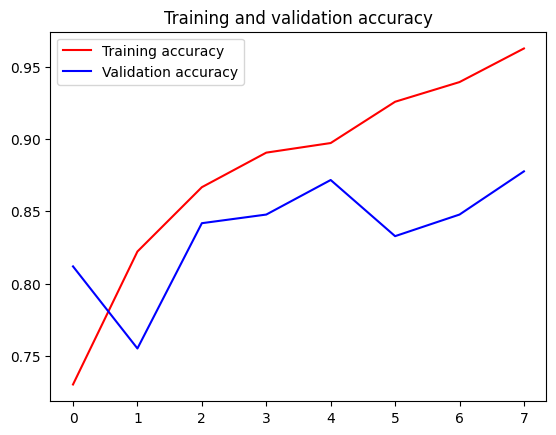

<Figure size 640x480 with 0 Axes>

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# **CNN MODEL EVALUATION**

In [22]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc, balanced_accuracy_score, matthews_corrcoef, recall_score

In [23]:
train_score = model.evaluate(x_train, y_train)

test_score = model.evaluate(x_test, y_test)

val_score = model.evaluate(x_val, y_val)

print("Train Accuracy", train_score[1])
print("Test Accuracy", test_score[1])
print("Validation Accuracy", val_score[1])

95/95 ━━━━━━━━━━━━━━━━━━━━ 40s 414ms/step - accuracy: 0.9719 - loss: 0.0865
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 443ms/step - accuracy: 0.8840 - loss: 0.3986
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 346ms/step - accuracy: 0.8712 - loss: 0.4946
Train Accuracy 0.972139298915863
Test Accuracy 0.8854415416717529
Validation Accuracy 0.8776119351387024


In [27]:
y_train_pred = model.predict(x_train)
y_train_pred_classes = y_train_pred.argmax(axis=1)
y_train_true_classes = y_train.argmax(axis=1)

print(classification_report(y_train_true_classes, y_train_pred_classes, target_names=CLASSES))


95/95 ━━━━━━━━━━━━━━━━━━━━ 40s 426ms/step
                precision    recall  f1-score   support

        Blight       0.93      0.98      0.95       820
   Common_Rust       1.00      0.99      0.99       927
Gray_Leaf_Spot       0.95      0.87      0.91       415
       Healthy       1.00      1.00      1.00       853

      accuracy                           0.97      3015
     macro avg       0.97      0.96      0.96      3015
  weighted avg       0.97      0.97      0.97      3015



In [29]:
y_val_pred = model.predict(x_val)
y_val_pred_classes = y_val_pred.argmax(axis=1)
y_val_true_classes = y_val.argmax(axis=1)

print(classification_report(y_val_true_classes, y_val_pred_classes, target_names=CLASSES))

11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 693ms/step
                precision    recall  f1-score   support

        Blight       0.86      0.80      0.83       104
   Common_Rust       0.96      0.96      0.96       112
Gray_Leaf_Spot       0.60      0.66      0.63        44
       Healthy       0.95      1.00      0.97        75

      accuracy                           0.88       335
     macro avg       0.84      0.85      0.85       335
  weighted avg       0.88      0.88      0.88       335



In [30]:
y_test_pred = model.predict(x_test)
y_test_pred_classes = y_test_pred.argmax(axis=1)
y_test_true_classes = y_test.argmax(axis=1)

print(classification_report(y_test_true_classes, y_test_pred_classes, target_names=CLASSES))

27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 521ms/step
                precision    recall  f1-score   support

        Blight       0.79      0.86      0.83       222
   Common_Rust       0.95      0.93      0.94       267
Gray_Leaf_Spot       0.72      0.61      0.66       115
       Healthy       0.98      1.00      0.99       234

      accuracy                           0.89       838
     macro avg       0.86      0.85      0.85       838
  weighted avg       0.88      0.89      0.88       838



# Test Accuracy, Precision, Sensivity, F1

In [32]:
y_test_pred = model.predict(x_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

report = classification_report(y_test_classes, y_test_pred_classes, target_names=CLASSES)

print(report)

27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 440ms/step
                precision    recall  f1-score   support

        Blight       0.79      0.86      0.83       222
   Common_Rust       0.95      0.93      0.94       267
Gray_Leaf_Spot       0.72      0.61      0.66       115
       Healthy       0.98      1.00      0.99       234

      accuracy                           0.89       838
     macro avg       0.86      0.85      0.85       838
  weighted avg       0.88      0.89      0.88       838



# Test MCC Mahtewss Corelation Coefficient

In [33]:
y_test_pred = model.predict(x_test)
y_test_pred_classes = y_test_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

mcc = matthews_corrcoef(y_test_classes, y_test_pred_classes)

print(f"Matthews Correlation Coefficient (MCC): {mcc}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 363ms/step
Matthews Correlation Coefficient (MCC): 0.8435487299203754


# Test Balanced Accuracy

In [34]:
y_test_pred = model.predict(x_test)
y_test_pred_classes = y_test_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

balanced_acc = balanced_accuracy_score(y_test_classes, y_test_pred_classes)

print(f"Balanced Accuracy: {balanced_acc}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 395ms/step
Balanced Accuracy: 0.8485951614310188


# Test Roc-Auc Score

In [35]:
from sklearn.preprocessing import label_binarize

y_test_classes = np.argmax(y_test, axis=1)

y_pred_prob = model.predict(x_test)

y_test_binarized = label_binarize(y_test_classes, classes=[0,1,2,3])

roc_auc_multi = roc_auc_score(y_test_binarized, y_pred_prob, multi_class='ovr')
print(f"ROC AUC Score (Multi-class): {roc_auc_multi}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 463ms/step
ROC AUC Score (Multi-class): 0.9735782263078281


# CNN Classification Report

In [36]:
y_test_pred = model.predict(x_test)
y_test_pred_classes = y_test_pred.argmax(axis=1)
y_test_true_classes = y_test.argmax(axis=1)

print(classification_report(y_test_true_classes, y_test_pred_classes, target_names=CLASSES))

27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 466ms/step
                precision    recall  f1-score   support

        Blight       0.79      0.86      0.83       222
   Common_Rust       0.95      0.93      0.94       267
Gray_Leaf_Spot       0.72      0.61      0.66       115
       Healthy       0.98      1.00      0.99       234

      accuracy                           0.89       838
     macro avg       0.86      0.85      0.85       838
  weighted avg       0.88      0.89      0.88       838



# CNN Confusion Matrix

In [37]:
y_test_pred = model.predict(x_test)
y_test_pred_classes = y_test_pred.argmax(axis=1)
y_test_true_classes = y_test.argmax(axis=1)

cm = confusion_matrix(y_test_classes, y_test_pred_classes)
print(cm)

27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 390ms/step
[[192   8  22   0]
 [ 13 247   5   2]
 [ 38   5  70   2]
 [  0   1   0 233]]


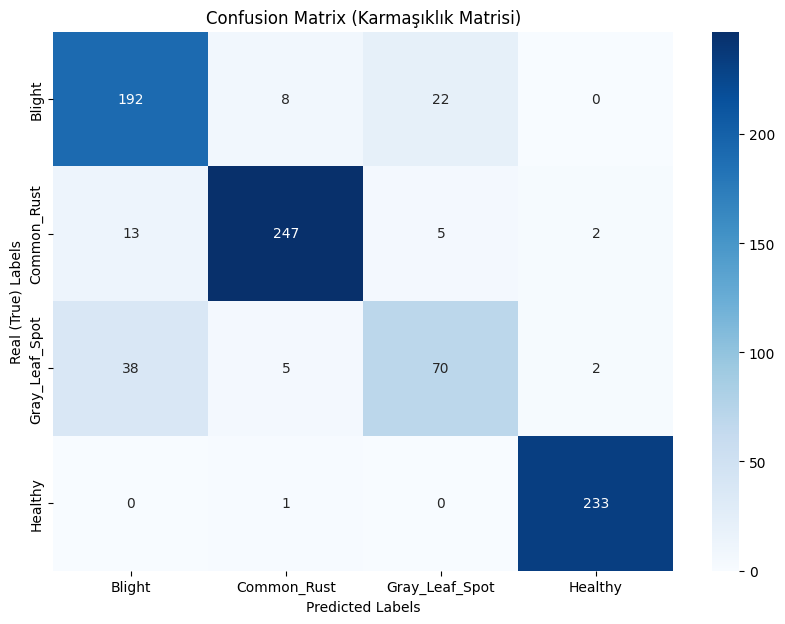

In [38]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASSES, yticklabels=CLASSES)
plt.title("Confusion Matrix (Karmaşıklık Matrisi)")
plt.xlabel("Predicted Labels")
plt.ylabel("Real (True) Labels")
plt.show()

# CNN ROC Graph

27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 513ms/step


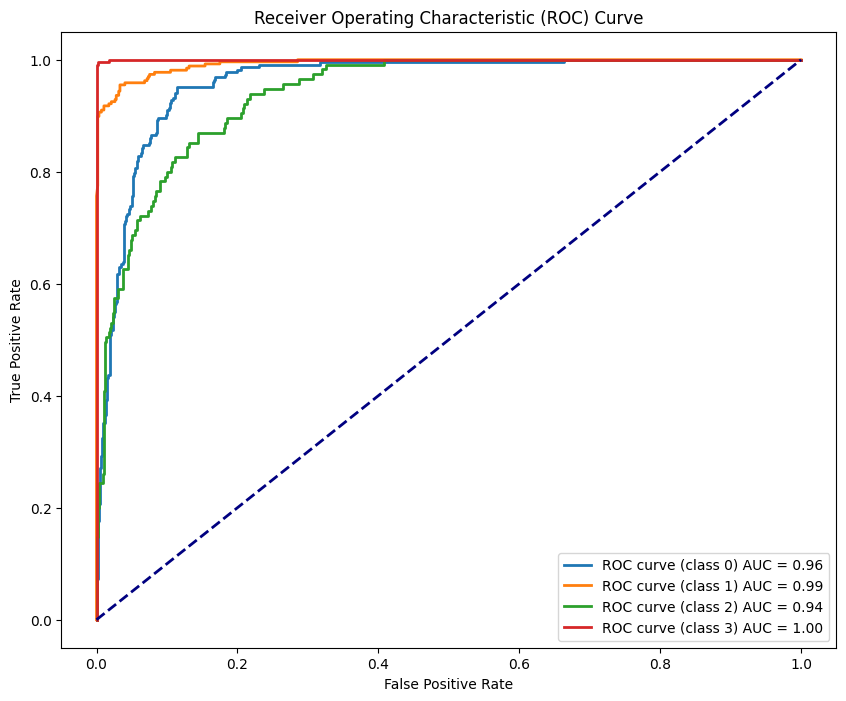

Mean AUC: 0.9736


In [39]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Gerçek etiketler (sınıf sayısını belirtmek için 4 sınıf var)
y_test_classes = np.argmax(y_test, axis=1)  # Gerçek sınıflar (etiketler)
y_pred = model.predict(x_test)
y_pred_probabilities = y_pred  # Olasılıkları alıyoruz

# Sınıf etiketlerini ikili hale getiriyoruz (binarize) çünkü ROC için gereklidir
y_test_bin = label_binarize(y_test_classes, classes=[0, 1, 2, 3])  # Sınıflar: 0, 1, 2, 3
n_classes = y_test_bin.shape[1]  # Sınıf sayısı

# ROC eğrisini çizmek için her sınıf için ROC eğrisini hesaplıyoruz
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tüm sınıflar için ROC eğrisini çiziyoruz
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class {0}) AUC = {1:0.2f}'.format(i, roc_auc[i]))

# Diagonal çizgiyi çiziyoruz (rastgele tahminin grafiği)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Grafik etiketlerini ve başlığını ekliyoruz
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Ortalama AUC
mean_auc = np.mean(list(roc_auc.values()))
print(f'Mean AUC: {mean_auc:.4f}')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier


model = KerasClassifier(build_fn=create_model, verbose=0)

param_grid = {
    'batch_size': [16, 32],
    'epochs': [10, 20, 30],
}

# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

# grid_result = grid.fit(x_train, y_train)

# print(f"Best Parameters: {grid_result.best_params_}")
# print(f"Best Accuracy: {grid_result.best_score_}")


random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=3, scoring='accuracy', random_state=26)
random_search_result = random_search.fit(x_train, y_train)


print(f"Best Parameters: {random_search_result.best_params_}")
print(f"Best Accuracy: {random_search_result.best_score_}")

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
